**1. Import Necessary Libraries**

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import math

**2. To read the data into Python.**

In [2]:
df = pd.read_csv('NIFTY 50-11-08-2024-to-11-08-2025.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,12-AUG-2024,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,13-AUG-2024,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,14-AUG-2024,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,16-AUG-2024,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,19-AUG-2024,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


### **DATA CLEANING**

**3. Check For any missing Values**

In [3]:
print(df.isnull().sum())    # return total no. of null values in each attribute

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64


**4. Check for any duplicate entries**

In [4]:
print(df.duplicated().sum())    # return total no. of duplicate rows in the dataset

0


**5. Stripping trailing spaces in column names**

In [5]:
df.columns = df.columns.str.strip()     # Remove leading and trailing whitespace in column names
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')


**6. Rename Columns**

In [6]:
df = df.rename ({'Turnover (₹ Cr)': 'Turnover (Cr Rs)'}, axis =1)   # renaming since the original name had a currency symbol
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr Rs)
0,12-AUG-2024,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,13-AUG-2024,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,14-AUG-2024,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,16-AUG-2024,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,19-AUG-2024,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


**7. Dealing with Inconsistent Data**

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns    # return the names of attributes that are of numerical types like integer or float or decimal
print(numerical_cols)

Index(['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Cr Rs)'], dtype='object')


In [8]:
# Check if any attribute has negative value as these are quantitative attributes and can only have positive values
for col in numerical_cols:
    invalid = df[df[col] < 0]   # Create a new DataFrame containing only the rows where the value in the current column is negative

    if not invalid.empty:
        print(f"Invalid (negative) values found in '{col}':\n", invalid)
        print("-" * 30) # Print a separator for better readability

**8. Check for Data Types**

In [9]:
print(df.info())    # Check if every attribute has appropriate data types and count of records in each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              249 non-null    object 
 1   Open              249 non-null    float64
 2   High              249 non-null    float64
 3   Low               249 non-null    float64
 4   Close             249 non-null    float64
 5   Shares Traded     249 non-null    int64  
 6   Turnover (Cr Rs)  249 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB
None


**9. Convert Date to Approriate Date type**

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')      # Convert 'Date' column to datetime64[ns], a data type for storing date and time with nanosecond precision
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              249 non-null    datetime64[ns]
 1   Open              249 non-null    float64       
 2   High              249 non-null    float64       
 3   Low               249 non-null    float64       
 4   Close             249 non-null    float64       
 5   Shares Traded     249 non-null    int64         
 6   Turnover (Cr Rs)  249 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB
None


-------
**SUMMARY OF DATA CLEANING:**

-------

- No missing values.
- No duplicate records.
- No negative values in any attributes.
- Removed Trailing spaces in column names.
- Renamed Columns.
- Set appropriate Data types for all attributes.
- saved the cleaned data.

### **DESCRIPTIVE STATISTICAL ANALYSIS**

**10. To produce a numerical summary of the variables in the data set.**

In [11]:
df.describe()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr Rs)
count,249,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000
mean,2025-02-09 00:57:49.879517952,24265.656024,24378.899598,24138.593173,24257.550201,3.125471e+08,29410.097550
min,2024-08-12 00:00:00,21758.400000,22105.050000,21743.650000,22082.650000,3.881139e+07,3348.450000
25%,2024-11-08 00:00:00,23543.800000,23689.850000,23433.500000,23532.700000,2.518498e+08,24202.410000
50%,2025-02-06 00:00:00,24419.500000,24537.600000,24295.550000,24435.500000,2.875352e+08,27573.990000
75%,2025-05-14 00:00:00,24999.400000,25073.100000,24825.900000,24971.300000,3.510820e+08,32606.340000
max,2025-08-08 00:00:00,26248.250000,26277.350000,26151.400000,26216.050000,8.538910e+08,89554.910000
std,NaN,929.147347,916.159219,933.388444,922.539753,1.004560e+08,9363.829115


**11. Coefficient Of Variation**

In [12]:
# CoV should be low, ideally < 1, which indicates low volatility in the data.
# If CoV is low, it means the data points are close to the mean and there are no extreme outliers.

print("--- Coefficient of Variation (CV) ---")
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    if mean != 0:
        cv = (std / mean) * 100
        print(f"CV for {col}: {cv:.2f}%")
    else:
        print(f"CV for {col}: Mean is zero, cannot calculate CV.")

--- Coefficient of Variation (CV) ---
CV for Open: 3.83%
CV for High: 3.76%
CV for Low: 3.87%
CV for Close: 3.80%
CV for Shares Traded: 32.14%
CV for Turnover (Cr Rs): 31.84%


**12. Median and Mode**

In [13]:
# The median provides a measure of central tendency that is robust to outliers, while the mode indicates the most frequently occurring value.
# Mean > Median > Mode means right-skewed distribution (positive skewness)
# Mean < Median < Mode means left-skewed distribution (negative skewness)
# Mean = Median = Mode means symmetric distribution

print("--- Median and Mode ---")
for col in numerical_cols:
    median = df[col].median()
    mode = df[col].mode()
    mean = df[col].mean()
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    if not mode.empty:
        print(f"  Mode: {', '.join(mode.astype(str).tolist())}")
    else:
        print("  Mode: No unique mode found (or multiple modes)")

--- Median and Mode ---
Open:
  Mean: 24265.66
  Median: 24419.50
  Mode: 21758.4, 21974.45, 22073.05, 22194.55, 22345.95, 22353.15, 22433.4, 22446.75, 22460.3, 22476.35, 22508.65, 22516.45, 22521.85, 22536.35, 22541.5, 22568.95, 22609.35, 22662.25, 22695.4, 22809.9, 22821.1, 22847.25, 22857.2, 22874.95, 22940.15, 22960.45, 22963.65, 23026.75, 23036.6, 23050.8, 23055.75, 23096.45, 23099.15, 23128.3, 23150.3, 23165.9, 23168.25, 23169.5, 23183.9, 23190.4, 23192.6, 23195.4, 23250.45, 23277.1, 23290.4, 23296.75, 23319.35, 23341.1, 23344.1, 23368.35, 23377.25, 23383.55, 23401.85, 23411.8, 23421.65, 23433.95, 23488.45, 23509.9, 23515.4, 23528.6, 23529.55, 23542.15, 23543.8, 23551.9, 23560.6, 23600.4, 23605.3, 23637.65, 23649.5, 23674.75, 23679.9, 23700.95, 23738.2, 23746.65, 23751.5, 23761.95, 23769.1, 23775.8, 23783.0, 23796.9, 23801.4, 23801.75, 23822.45, 23877.15, 23916.5, 23927.15, 23935.75, 23949.15, 23960.7, 24045.8, 24070.25, 24087.25, 24140.85, 24184.4, 24185.4, 24196.4, 24204.8, 242

**13. Skewness Coefficient**

In [14]:
# Skewness indicates the asymmetry of the distribution of values in a dataset.
# If skewness > 0, the data is right-skewed (long tail on the right).
# If skewness < 0, the data is left-skewed (long tail on the left).
# If skewness = 0, the data is perfectly symmetrical.

print("--- Skewness Coefficient ---")
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness for {col}: {skewness:.2f}")
    if skewness > 0.5:
        print(f"  - {col} is right-skewed.")
    elif skewness < -0.5:
        print(f"  - {col} is left-skewed.")
    elif skewness >= -0.5 and skewness <= 0.5:
        print(f"  - {col} is fairly symmetrical.")
    else:
        print(f"  - {col} shows moderate skewness.")

--- Skewness Coefficient ---
Skewness for Open: -0.45
  - Open is fairly symmetrical.
Skewness for High: -0.45
  - High is fairly symmetrical.
Skewness for Low: -0.39
  - Low is fairly symmetrical.
Skewness for Close: -0.40
  - Close is fairly symmetrical.
Skewness for Shares Traded: 1.72
  - Shares Traded is right-skewed.
Skewness for Turnover (Cr Rs): 2.62
  - Turnover (Cr Rs) is right-skewed.


-------
**SUMMARY OF DESCRIPTIVE STATISTICAL ANALYSIS:**

-------
Since,
* Coefficient of Variation of attribute `Shares Traded` & `Turnover` is higher,
* comparison of Mean, Median and Mode:
    - For `Shares Traded`, Mean > Median
    - For `Turnover`, Mean > Median
* Skewness Coefficient for the above attributes further shows their values are higher than 0.5

We conclude that the above mentioned attributes have **potential outliers** and **right-Skewed**.

### **EXPLORATORY DATA ANALYSIS**

**14. Univariate Analysis: Analysis on numerical Variables**

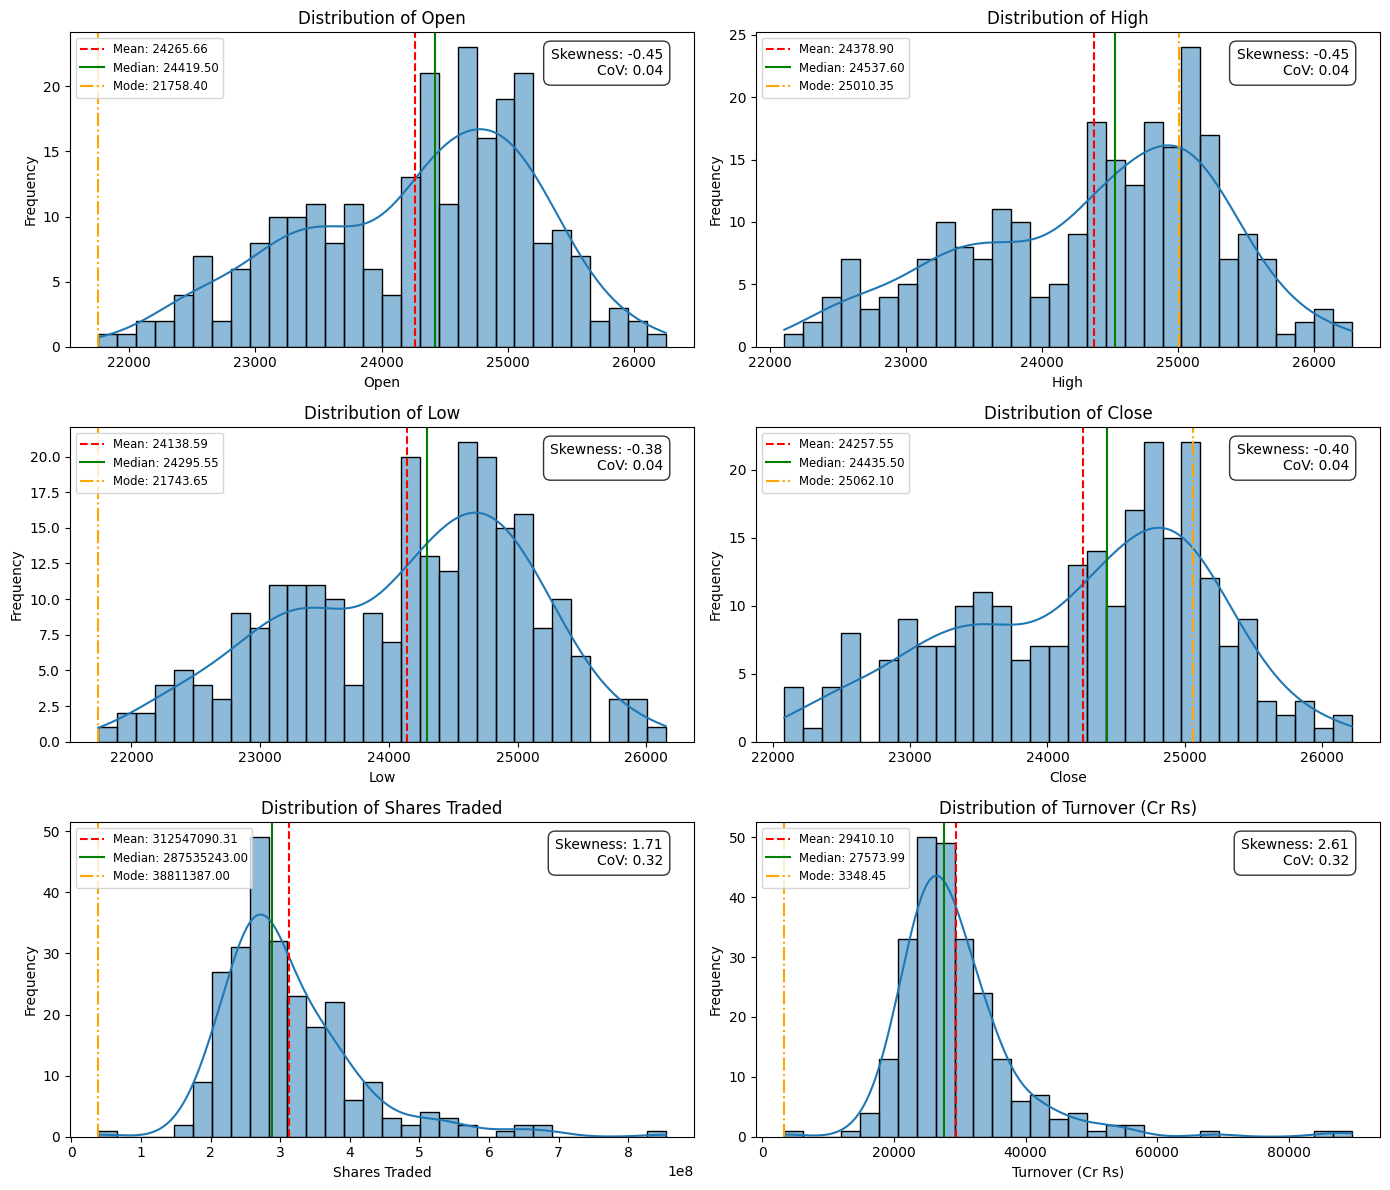

In [15]:
# Visualize distributions of numerical columns using Histogram plot
# This helps to understand the distribution and identify any potential outliers.
# Kernel Density Estimation (KDE) is also plotted to visualize the distribution shape.
# The mean, median, and mode are indicated on the plots for reference.
# Additionally, the skewness is displayed to understand the asymmetry of the distribution.
# The coefficient of variation (CV) is also shown to assess the relative variability.

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    
    # Calculate key statistics
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0] if not df[col].mode().empty else None
    std_dev = df[col].std()
    
    # Calculate Skewness and Coefficient of Variation (CoV) using scipy's skewness to get a unbiased version of skewness
    skewness = skew(df[col], nan_policy='omit')
    cov = (std_dev / mean) if mean != 0 else np.inf

    # Plot the histogram
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot lines for mean, median, and mode
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    if mode is not None:
        plt.axvline(mode, color='orange', linestyle='-.', label=f'Mode: {mode:.2f}')
    
    # Add a text box with the statistics
    stats_text = f"Skewness: {skewness:.2f}\n" \
                 f"CoV: {cov:.2f}"
    
    plt.legend(loc='upper left', fontsize='small')
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

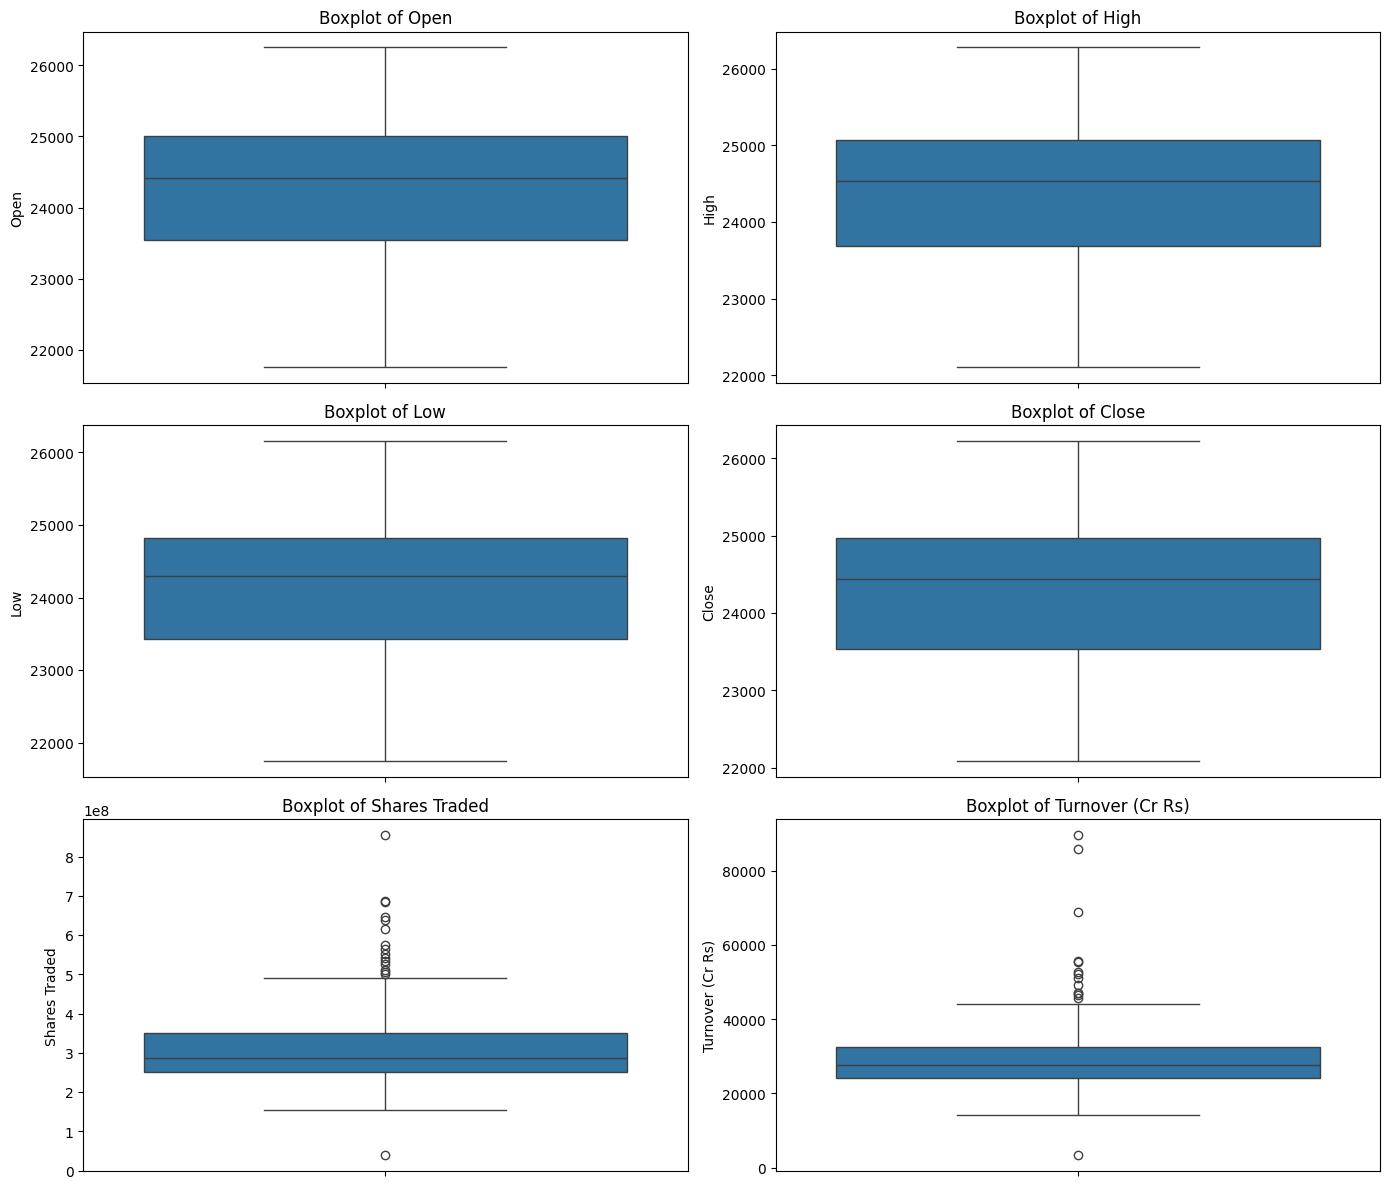

In [16]:
# Visualize distributions of numerical columns using Box plot

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insights of Step 14**

In addition to initial statistical checks, detailed univariate analysis using histogram and boxplots confirmed the presence of significant outliers in key numerical attributes.

We conclude that the `Shares Traded` & `Turnover` attribute has **potential outliers & right-skewed / positive skewness**. The reasons are
* In histogram, most of the data points are concentrated on the right end, with a few values pulling the mean to the left.
* In box plot,
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers.

These points, largely representing plausible but exceptionally high or low characteristics, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

**15. Explore Relationship between variables: Correlation Coefficient Heatmap**

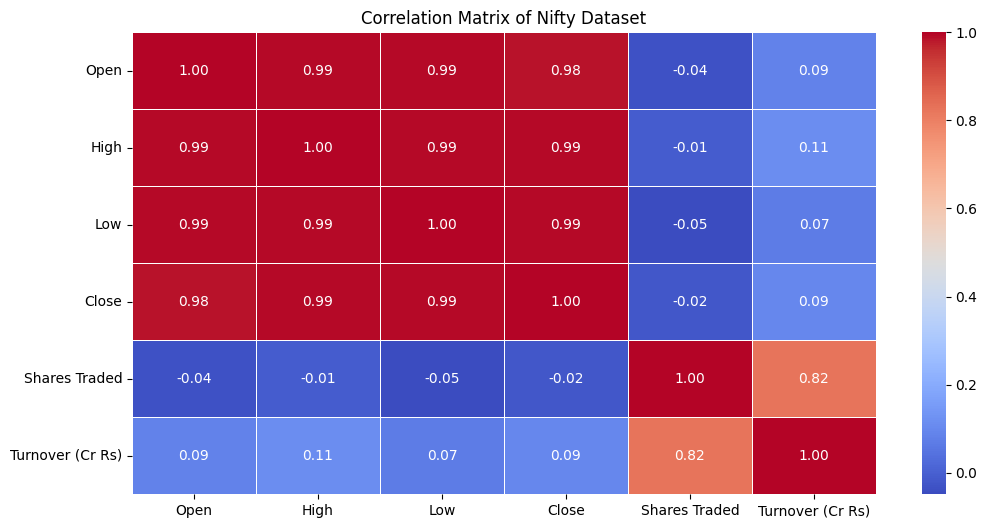

In [17]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Nifty Dataset')
plt.show()

**Insights of Step 15**

So, From the above correlation coefficient Heatmap, we can infer that,
* Positive Strong Correlation Exists between:
    * Open & High
    * Open & Low
    * Open & Close
    * Shares Traded & Turnover

So try with all features as it is and train the model, then engineer features Daily_Range = High - Low and Open_to_Close_Change = Close - Open while dropping shares Traded since Turnover is better for it normalizes the price of the day.

**16. Time Series Analysis:**

*Plotting the data over time helps you identify key components like trend (the long-term movement), seasonality (recurring patterns, which might not be obvious in daily stock data), and cyclicity (pattern that repeats over a fixed or predictable interval).*

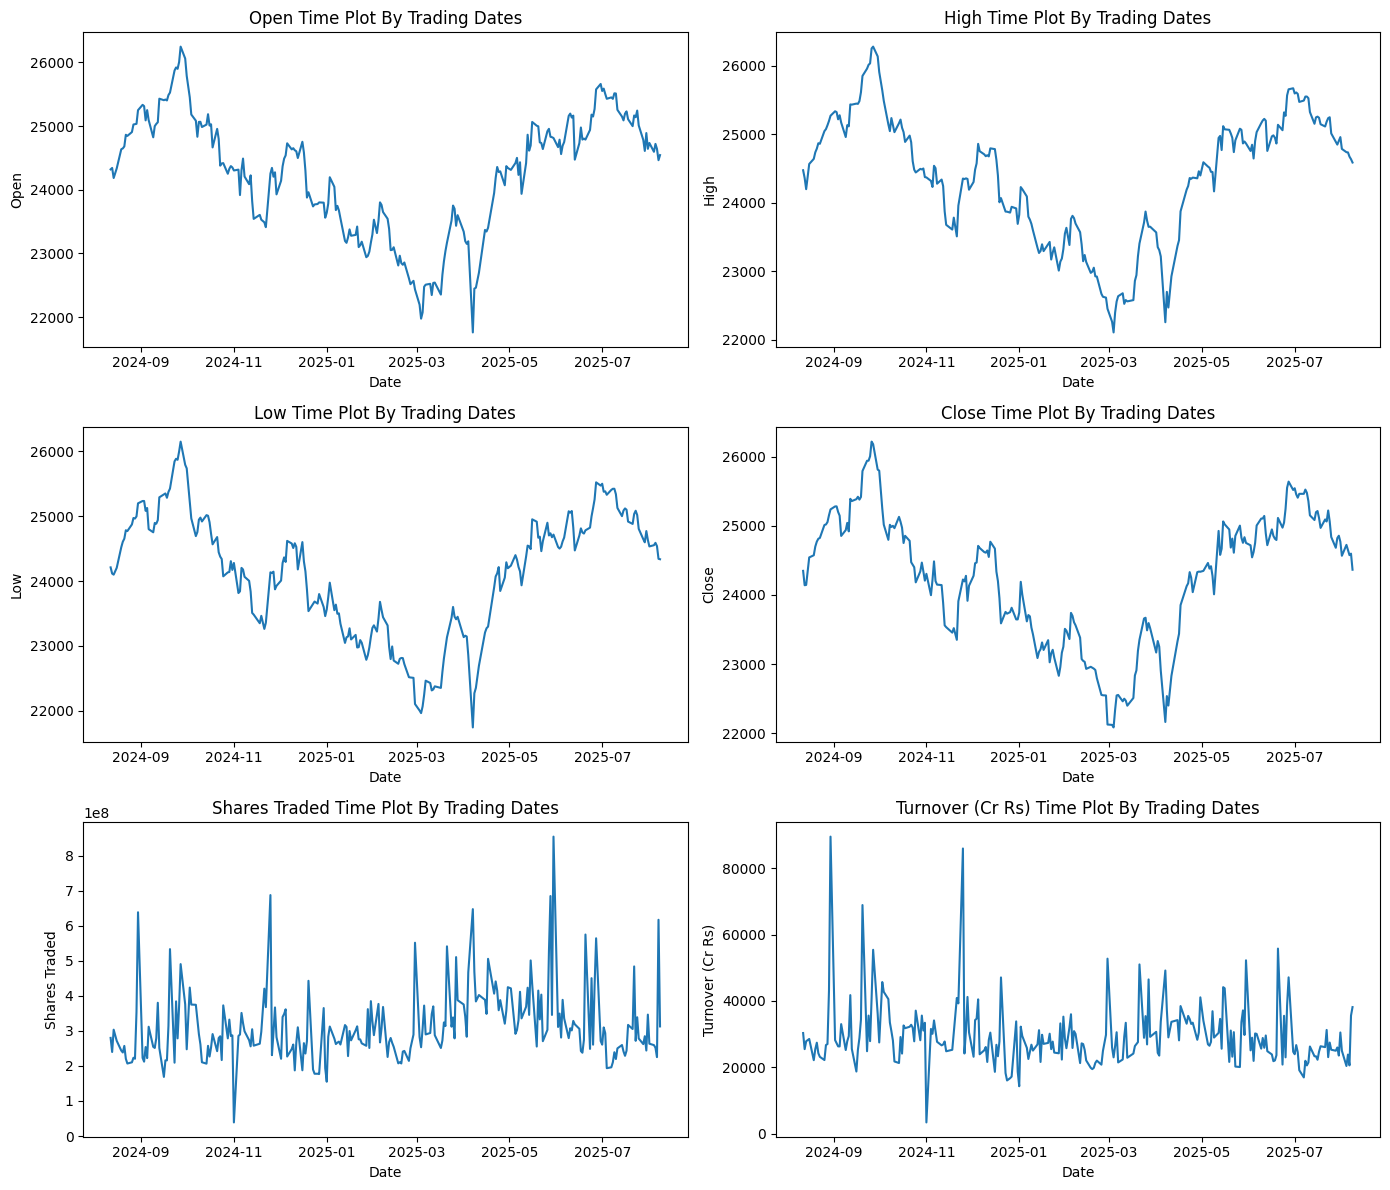

In [18]:
# Time plot
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    plt.plot(df['Date'], df[col])
    plt.title(f'{col} Time Plot By Trading Dates')
    plt.xlabel('Date')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

------
**SUMMARY OF EDA:**

------
- To Handle Outliers: [`Shares Traded`, `Turnover`]
    - Do nothing (or)
    - Remove outlier records (or)
    - Drop the attributes if not needed (or)
    - Transform the data
- Feature Engineering:
    - Daily_Range = High - Low
    - Open_to_Close_Change = Close - Open
    - Drop shares Traded
- The data is cyclical.
    - Linear regression model might struggle with non-linear relationship.
    - Random forest could better perform with non-linear relationship.

-------
**SUMMARY OF THE INTERMEDIATE STEPS TAKEN & REASON OF WHY NOT USED:**

-------
* *Feature Engineering: Engineering new features decided show potential outliers and transforming it reduced the performance of the model because of the disturbance in the linear relationship between the original predictor and target variable*
* *Feature Transformation: Experimented with Different Transformation techniques like log Transformation, Yeo-Johnson, Box-cox Transformation Techniques only resulted in model's poor performance again because of the disturbance in the linear relationship between the original predictor and target variable*

### **MODEL DEVELOPMENT**

**17. Handling Outliers**:

*Since the features [`Shares Traded`, `Turnover`] aren't necessary for building model for now, attributes are dropped*

In [19]:
X = df.drop(['Close', 'Shares Traded', 'Turnover (Cr Rs)'], axis=1)     # axis = 1 for dropping columns & if axis = 0 it drops rows
y = df['Close']

X = X.drop('Date', axis=1)

**18. Splitting Data into Training & Testing**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80-20 train-test split, random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (199, 3)
X_test shape: (50, 3)
y_train shape: (199,)
y_test shape: (50,)


**19. Scaling Features:**

In [21]:
scaler = StandardScaler()   # Standardize features by removing the mean and scaling to unit variance (z-score normalization)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

**20. Model Training & Performance Analysis**

In [ ]:
# Model Training and getting predictions for test data
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
lr_y_pred = lr_model.predict(x_test_scaled)

# Evaluate the model
# Since this is a regression problem, we will use R-squared as a measure of accuracy
# R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variables
# We need low RMSE and high R-squared, meaning the model should be able to predict the stock prices accurately

lr_rmse = root_mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Root Mean Squared Error: {lr_rmse}")
print(f'R-squared: {round(lr_r2, 2)*100 }%')

Root Mean Squared Error: 69.33725780813583
R-squared: 99.0%


**21. Save the model**

In [ ]:
joblib.dump(lr_model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

**22. Load & make predictions on the saved model**

In [ ]:
# Load the saved Linear Regression model
loaded_linear_model = joblib.load('linear_regression_model.joblib')

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

# Use the loaded model to make predictions
print("--- Model Predictions ---")
predictions = loaded_linear_model.predict(x_test_scaled)
print(np.round(predictions, 2))
print()

print("--- Actual Values ---")
print(np.round(y_test.values, 2))
print()

# Calculate and print prediction errors
# Prediction error is the difference between the predicted and actual values
print("--- Prediction Errors ---")
print(np.round(predictions - y_test.values, 2))

--- Model Predictions ---
[22609.51 24744.78 23740.22 24425.53 23065.76 24365.57 24773.34 24134.32
 24993.03 23424.01 24622.83 25151.33 24600.53 24761.23 23401.15 25374.59
 24853.09 25244.36 22948.97 25370.9  24576.31 24877.52 23223.1  23700.84
 24307.47 24993.75 24425.49 25014.03 25957.84 23452.95 24607.08 26179.41
 22106.63 23380.81 25372.45 23075.2  24921.7  24844.5  24282.09 23520.15
 23278.46 23592.79 23301.02 24856.52 24742.55 25184.8  25036.18 23323.48
 24163.62 24822.49]

--- Actual Values ---
[22547.55 24770.2  23742.9  24484.05 23155.35 24379.6  24752.45 24008.
 25010.6  23431.5  24716.6  25044.35 24620.2  24680.9  23453.8  25461.
 24853.15 25279.85 22904.45 25383.75 24574.2  24936.4  23092.2  23518.5
 24328.5  24971.3  24340.85 25017.75 25940.4  23482.15 24542.5  26178.95
 22119.3  23165.7  25418.55 23024.65 24852.15 24826.2  24246.7  23519.35
 23249.5  23644.8  23311.8  24924.7  24683.9  25198.7  25001.15 23349.9
 24328.95 24795.75]

--- Prediction Errors ---
[  61.96  -25.

**23. Visualizing Model Predictions Against Ground Truth**

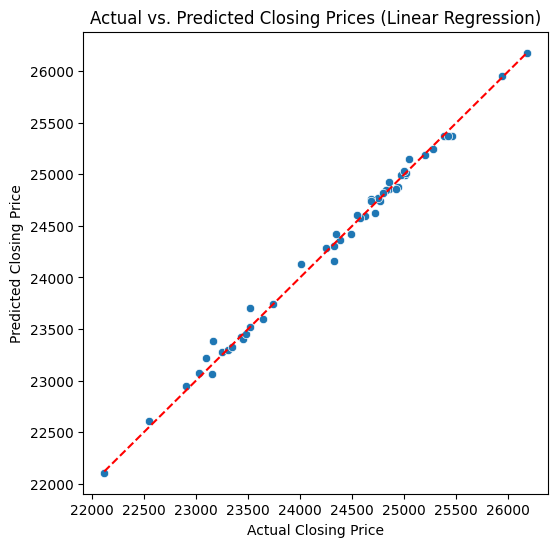

In [25]:
# Scatter Plot
# The red line represents the ideal prediction (y=x)
# If the model predictions were perfect, all points would lie on this line

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test.values, y=predictions)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices (Linear Regression)")
plt.show()

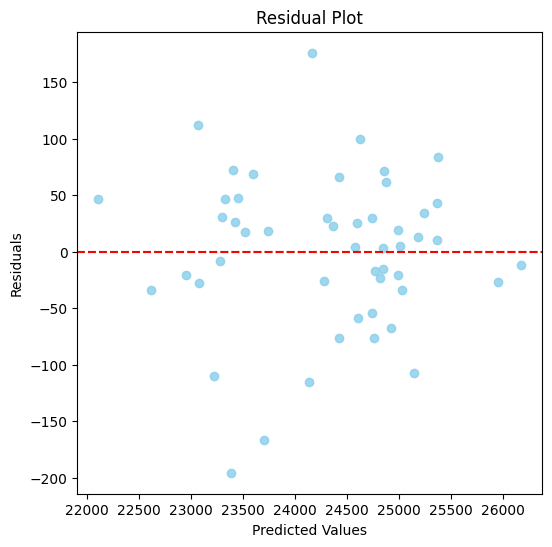

In [26]:
# Residual Plot
# The residuals should be randomly distributed around zero

plt.figure(figsize=(6, 6))
sns.residplot(x=predictions, y=y_test.values, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

-----
 **MODEL PERFORMANCE ON DIFFERENT DATA PROCESSING & CONFIGURATIONS**

------
##### **TRIAL 1:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied),
* used standard scaler.
* *The linear model outperformed Random Forest.*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.21451114333215
* Mean Squared Error: 4930.08
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 95.72347543915406
* Mean Squared Error: 9162.98375015033
* R-squared: 0.9885475665989905

-----------------------

##### **TRIAL 2:**

**Dataset Used:**
* cleaned & preprocessed dataset (no feature engineering applied),
* used standard scaler.
* *The linear model outperformed Random Forest but not as good as with unprocessed data*
* *So, log transformation isn't right preprocessing technique*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.7300053489991
* Mean Squared Error: 5002.73
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 99.10910053653166
* Mean Squared Error: 9822.61380916034
* R-squared: 0.9877231223430468

-----------------------


##### **TRIAL 3:**

**Dataset Used:**
* cleaned & preprocessed dataset & feature engineering applied dataset,
* used standard scaler.
* *The linear model with unprocessed data works the best*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 164.60245941873052
* Mean Squared Error: 27093.97
* R-squared: 0.97

---- Random Forest Regressor ----:
* Root Mean Squared Error: 204.53475557305543
* Mean Squared Error: 41834.466237329536
* R-squared: 0.9477128355223878

-------------------------

##### **TRIAL 4:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied),
* used robust scaler instead of standard scaler.
* *The linear model stays as it is while Random Forest underperformed than with standard scaling.*

**Model's Performance:**

---- Linear Regression ----:
* Root Mean Squared Error: 70.21451114333215
* Mean Squared Error: 4930.08
* R-squared: 0.99

---- Random Forest Regressor ----:
* Root Mean Squared Error: 98.69041135019415
* Mean Squared Error: 9739.797292470532
* R-squared: 0.9878266312728622

---------------------------

##### **TRIAL 5:**

**Dataset Used:**
* cleaned dataset (no preprocessing & no feature engineering applied)
* used standard scaler
* Dropped `Shares Traded` & `Turnover (Cr Rs)` attributes

---- Linear Regression ----:

**Model's Performance:**
* Root Mean Squared Error: 69.33725780813583
* R-squared: 99.0%

----------------------------

#### **RESULT SUMMARY:**

* RMSE of 69: This means that, on average, the model's predictions are off by only about ₹69 from the actual closing price. On comparing this to an average price of roughly ₹24,000, the error is approximately 0.3% of the value. That's an extremely small and impressive error.
* Model Achieved an accuracy of 99.4%
